# Линейная регрессия


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Задача та же:

https://www.kaggle.com/competitions/home-data-for-ml-course/overview

In [219]:
df = pd.read_csv('train.csv', sep=',')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [220]:
# ищем признаки с наиболее высокой корреляцией с целевой переменной

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)[:10]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [221]:
# взаимная корреляция признаков
df['GarageCars'].corr(df['GarageArea'])

np.float64(0.8824754142814625)

In [222]:
df['OverallQual'].corr(df['GrLivArea'])

np.float64(0.59300743002865)

In [223]:
# берем признаки с наиболее высокой корреляцией с целевой переменной

X = df[['GrLivArea', 'OverallQual','GarageCars']]
y = df['SalePrice']

In [224]:
X.isnull().sum()

,0
GrLivArea,0
OverallQual,0
GarageCars,0


In [225]:
# разобьем данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # размер тестовой выборки составит 20%

## Обучение базовой модели

Линейная регрессия:
* Хорошо работает, если зависимость между целевой переменной и признаками имеет линейный характер
* Хорошо интерпретируется
* Перед использованием лучше провести нормализацию данных, т.к масштаб влияет на веса


In [226]:
# импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим модель класса LinearRegression
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

Теперь сделаем предсказания с помощью метода **.predict(X)**. Заметьте, что в метод **.fit(X, y)** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **.predict(X)** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание.

In [227]:
y_pred = model.predict(X_test)

#print(y_pred)

### Интерпретирумость

In [228]:
model.coef_

array([   47.2285051 , 26772.48983385, 22239.45989805])

In [229]:
model.intercept_

np.float64(-94208.72140326074)

In [230]:
X_test[:1]

,GrLivArea,OverallQual,GarageCars
892,1068,6,1


In [231]:
-94208.72140326074 + 1068*47.2285051 + 6*26772.48983385 + 1*22239.45989805

139105.72094468924

In [232]:
y_pred[0]

np.float64(139105.72094361507)

## Оценка модели

Проверим результат. Воспользуемся метрикой RMSE

In [233]:
from sklearn import metrics

# средняя абсолютная ошибка
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))

# корень среднеквадратической ошибки
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# коэффициент детерминации r-квадрат
# ~ доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью
# 1-(D[ошибки модели]/D[целевой переменной])
print('R2 = ', metrics.r2_score(y_test, y_pred))

# средняя абсолютная процентная ошибка
print('MAPE = ', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE =  28121.524151747963
RMSE =  43032.15048041463
R2 =  0.7585805446926186
MAPE =  0.17547438845000224


In [234]:
df.SalePrice.mean()

np.float64(180921.19589041095)

### Геометрический смысл

In [235]:
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  58471.75652552955


Text(0, 0.5, "The property's sale price in dollars")

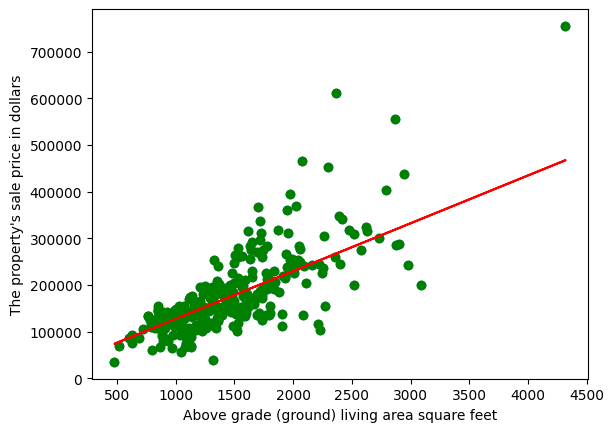

In [236]:
# построим график
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred, color = 'red')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

## Улучшения

In [237]:
#добавим логарифм цены
df['logSalePrice'] = np.log1p(df['SalePrice'])

#обратная - np.expm1
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016


In [238]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  0.1939398967886489


In [239]:
print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
print('R2 = ', metrics.r2_score(np.expm1(y_test), np.expm1(y_pred)))

RMSE =  35505.80572467265
R2 =  0.835644246919127


### Нормализация

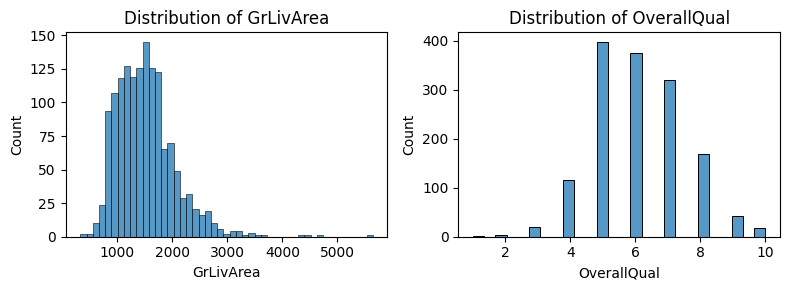

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(df['GrLivArea'], ax=axes[0])
axes[0].set_title('Distribution of GrLivArea')

sns.histplot(df['OverallQual'], ax=axes[1])
axes[1].set_title('Distribution of OverallQual')

plt.tight_layout()
plt.show()

<Axes: xlabel='GrLivArea'>

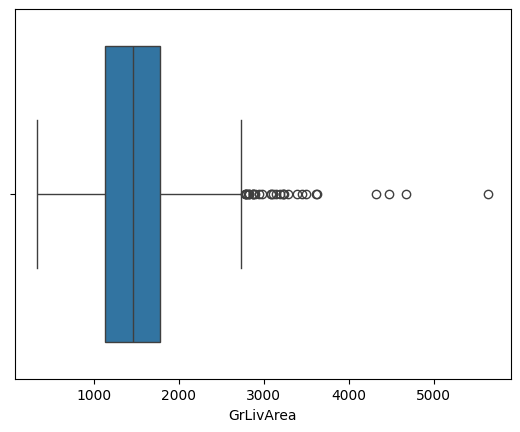

In [241]:
sns.boxplot(x=df['GrLivArea'])

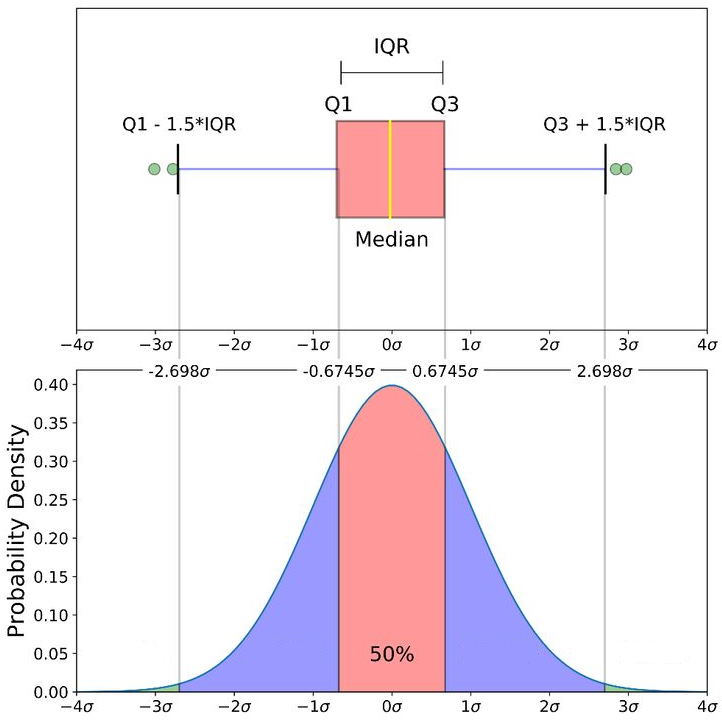

In [242]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

In [243]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
minmax_df = pd.DataFrame(minmax_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = StandardScaler() #приводит к нулевому среднему и единичному стандартному отклонению
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = RobustScaler() # использует медиану и межквартильный размах
robust_df = scaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

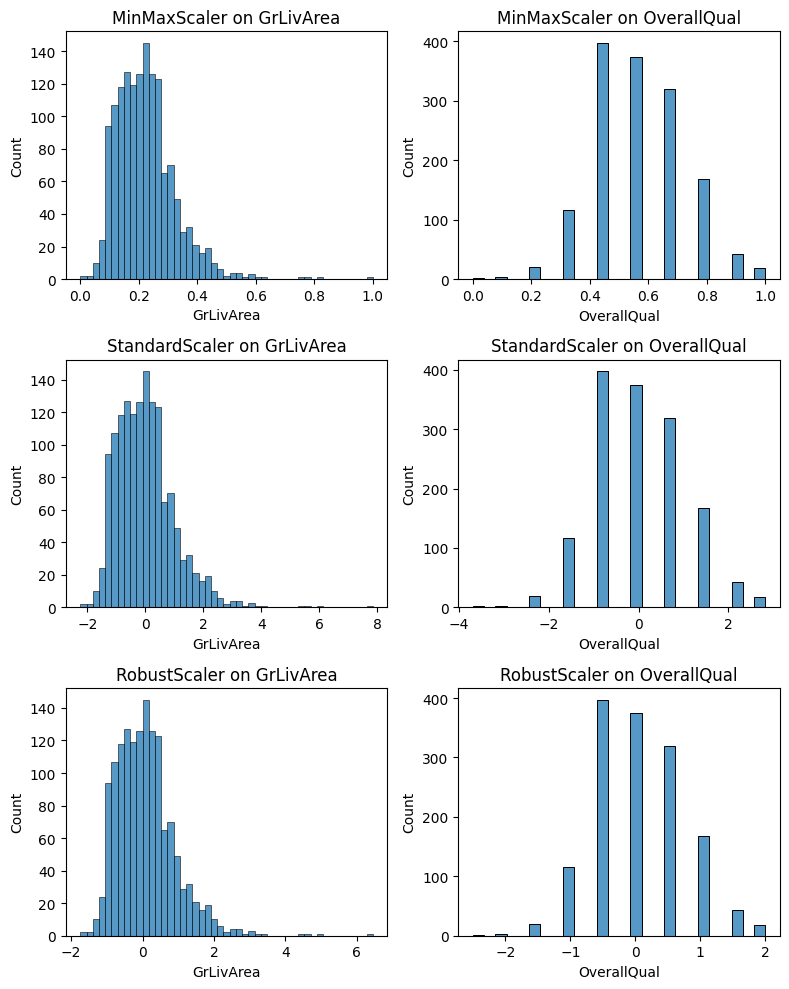

In [244]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

sns.histplot(minmax_df['GrLivArea'], ax=axes[0, 0])
axes[0, 0].set_title('MinMaxScaler on GrLivArea')

sns.histplot(minmax_df['OverallQual'], ax=axes[0, 1])
axes[0, 1].set_title('MinMaxScaler on OverallQual')

sns.histplot(standard_df['GrLivArea'], ax=axes[1, 0])
axes[1, 0].set_title('StandardScaler on GrLivArea')

sns.histplot(standard_df['OverallQual'], ax=axes[1, 1])
axes[1, 1].set_title('StandardScaler on OverallQual')

sns.histplot(robust_df['GrLivArea'], ax=axes[2, 0])
axes[2, 0].set_title('RobustScaler on GrLivArea')

sns.histplot(robust_df['OverallQual'], ax=axes[2, 1])
axes[2, 1].set_title('RobustScaler on OverallQual')

plt.tight_layout()
plt.show()

In [245]:
X = robust_df[['OverallQual', 'GarageCars', 'GrLivArea']]

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  43032.15048041463


### Выбросы

In [246]:
#Неправильно (хоть результат и кажется приятным)

df_filtered = df[df["GrLivArea"]<4000]

X = df_filtered[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  35702.09888359374


In [247]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

outliers = X_train[X_train["GrLivArea"]>4000].index
outliers

Index([1182, 523, 1298], dtype='int64')

In [248]:
X_train = X_train.drop(outliers)
y_train = y_train.drop(outliers)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  42521.557863140835


In [250]:
corr_matrix["SalePrice"].sort_values(ascending=False).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [329]:
X = df[['Id', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal',  'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']]

### Заполнение пропусков

In [253]:
X.isnull().sum().sort_values(ascending=False)[:4]

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
OverallQual,0


In [316]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

<Axes: xlabel='LotFrontage', ylabel='Count'>

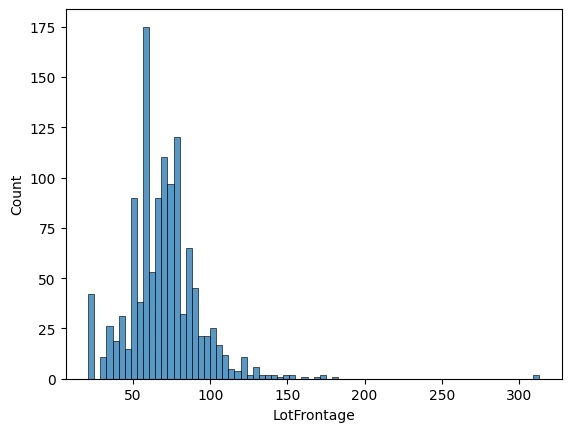

In [255]:
sns.histplot(x=df['LotFrontage'])

In [256]:
df['LotFrontage'].mean()

np.float64(70.04995836802665)

In [310]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [258]:
df['GarageYrBlt'].mode()

,GarageYrBlt
0,2005.0


Также есть библиотека SimpleImputer

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

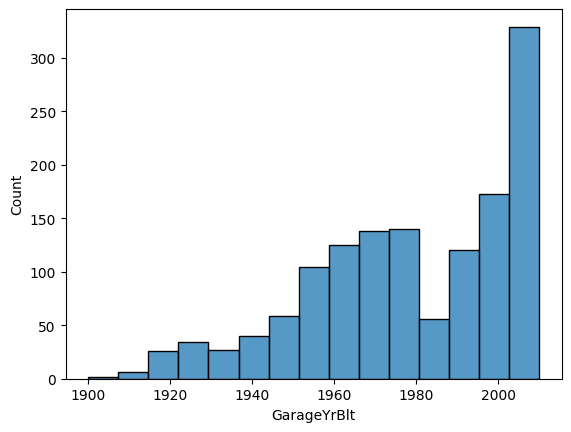

In [259]:
sns.histplot(x=X['GarageYrBlt'])

In [314]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # 'median' 'most_frequent'

df['GarageYrBlt'] = imputer.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

In [315]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=1)

X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

## Сравнение

In [339]:
X = df[['Id', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal',  'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']]

In [340]:
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  29837.545686487585


In [368]:
y = df['logSalePrice']

robust_df = RobustScaler().fit_transform(X)
X = pd.DataFrame(robust_df, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  29827.516330403763


## Регуляризация

In [369]:
X.columns

Index(['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [413]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  29827.516330403763


In [355]:
model.coef_

array([-1.56414688e+03,  3.60117603e+04,  1.92538908e+04,  1.18327635e+04,
       -6.99668432e+02,  4.18779708e+03,  7.72359224e+03,  3.19507379e+03,
        1.02998159e+04,  1.31112601e+04,  6.80492490e+03,  3.53848730e+03,
        4.08598474e+03,  4.56497903e+03,  4.50325433e+03, -2.55357485e+03,
        3.69694150e+03,  1.17154321e+04, -3.02760716e+02, -2.24240093e+03,
        1.83095642e+03,  1.13651795e+04, -1.88558807e+03, -8.67687926e+03,
        6.31156458e+01, -1.89715557e+01, -4.47767928e+02,  3.92259366e+01,
       -5.84165218e+00, -1.26484089e+03, -6.93099236e-01,  6.88009150e+00,
       -1.03873534e+03,  4.03091271e+03, -1.00999942e+04,  9.07747261e+00,
       -9.78426792e+03])

In [419]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  29829.929291446853


In [373]:
model.coef_

array([-4.16436854e-03,  1.70161903e-01,  7.50292572e-02,  7.49991224e-02,
        9.77629678e-03,  1.84546008e-02,  4.00180562e-02,  3.26370947e-02,
        2.88507537e-02,  1.34521163e-01,  4.82088427e-02, -1.24555266e-02,
       -3.26262925e-03,  4.96215600e-02,  1.27221706e-02, -9.82055798e-03,
        2.05971110e-02,  3.87134324e-02, -2.44696292e-03,  2.19028315e-02,
        7.54061254e-03,  7.17525418e-02,  3.62510279e-04,  2.07419913e-03,
        3.28852091e-04, -3.98322617e-04,  1.07843157e-03,  2.93632432e-04,
        2.40956088e-06,  1.56721751e-02, -2.11073710e-06,  1.12869625e-04,
       -1.09934761e-02,  4.46263580e-02, -3.70609331e-02,  1.55422529e-04,
       -4.43145670e-02])

In [415]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  87927.05711747566


In [384]:
model.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.58890680e-04,  2.55288984e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.02512804e-05, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.69176311e-04,
       -0.00000000e+00])

In [414]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  30790.39924396879


In [411]:
model.coef_

array([-0.00000000e+00,  1.54828631e-01,  8.20842791e-02,  6.38294066e-02,
        2.25962292e-02,  2.83116779e-02,  1.87495736e-02,  2.82111430e-02,
        2.93284670e-02,  1.04903341e-01,  5.42636202e-02,  3.72801112e-03,
        1.71664627e-04,  4.96473262e-02,  1.78826816e-02, -2.48909153e-03,
        2.21402985e-02,  1.72581903e-02,  0.00000000e+00,  1.89992042e-02,
        7.87897061e-03,  4.52894523e-02, -0.00000000e+00,  0.00000000e+00,
        3.53238971e-04, -3.72882006e-04,  0.00000000e+00,  3.12911773e-04,
        1.29786495e-05,  0.00000000e+00, -3.70622300e-06,  3.75807019e-05,
       -4.76641201e-03,  3.76093166e-02, -2.77889891e-02,  8.16468360e-05,
       -8.33689987e-03])